## Observations and Insights

## Dependencies and starter code

In [1]:
# Combine the data into a single dataset
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_data = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_set_df = pd.merge(mouse_data, study_results, how='inner', on=["Mouse ID"])
print("Observations from this dataset included: the heavier the mouse, the larger the tumor volume. Extended use of Capomulin showed smaller tumor sizes over time. Ketrapil showed the highest variance.")
data_set_df

Observations from this dataset included: the heavier the mouse, the larger the tumor volume. Extended use of Capomulin showed smaller tumor sizes over time. Ketrapil showed the highest variance.


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_counts = data_set_df["Drug Regimen"].value_counts()
grouped_regimen_df = data_set_df.groupby(["Drug Regimen"])
tumor_mean = grouped_regimen_df["Tumor Volume (mm3)"].mean()
tumor_median = grouped_regimen_df["Tumor Volume (mm3)"].median()
tumor_var = grouped_regimen_df["Tumor Volume (mm3)"].var()
tumor_standard_deviation = grouped_regimen_df["Tumor Volume (mm3)"].std()
tumor_sem = grouped_regimen_df["Tumor Volume (mm3)"].sem()
summary_table = pd.DataFrame({"Average": tumor_mean,
                              "Median": tumor_median,
                             "Variance": tumor_var,
                             "Standard Deviation": tumor_standard_deviation,
                              "SEM": tumor_sem})
summary_table

Average     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

## Bar plots

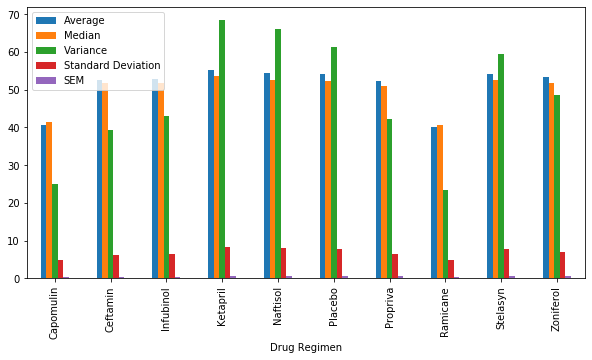

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
pandas_bar = summary_table.plot.bar(figsize=(10,5))

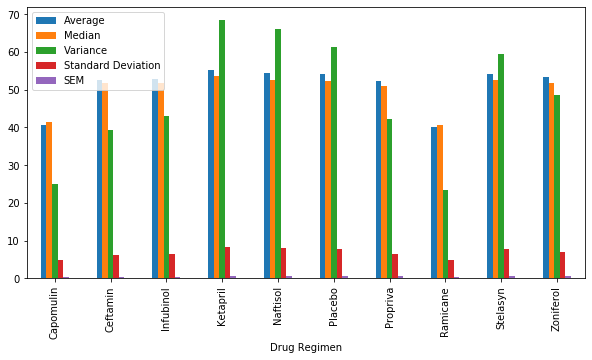

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
summary_table.plot(kind='bar',figsize=(10,5))

## Pie plots

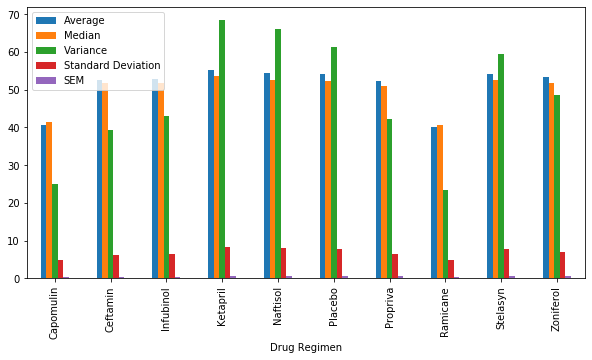

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
summary_table.plot(kind='bar',figsize=(10,5))

Male      958
Female    935
Name: Sex, dtype: int64

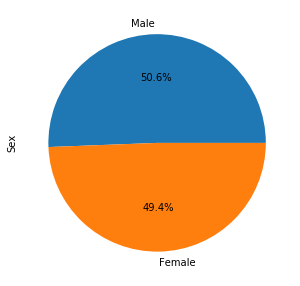

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = data_set_df["Sex"].value_counts()
gender_table = data_set_df.groupby("Sex")
gender_count.plot.pie(y='Sex', figsize=(5, 5), autopct="%1.1f%%")
gender_count

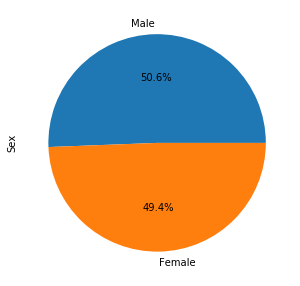

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count.plot(kind= "pie",figsize=(5, 5),autopct="%1.1f%%")

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
combined_data = data_set_df[["Mouse ID","Drug Regimen","Tumor Volume (mm3)", "Timepoint"]]
regimen_index = combined_data.set_index("Drug Regimen")
promising_regimens = regimen_index.loc[['Capomulin', 'Ramicane',"Infubinol", "Ceftamin"]]
reset_promising_regimens = promising_regimens.reset_index()
mouse = combined_data.groupby("Mouse ID").max()
mousetime = mouse['Timepoint']
reset_mousetime = mousetime.reset_index()
promising_reg_mousetime = pd.merge(reset_promising_regimens,reset_mousetime,how="inner", on =["Mouse ID","Timepoint"])
promising_reg_mousetime


#Calculate the IQR and quantitatively determine if there are any potential outliers.
Tumor_append =[ ]
promising_drugs = ['Capomulin', 'Ramicane',"Infubinol", "Ceftamin"]
for drug in promising_drugs:
    promising_drug = promising_reg_mousetime[promising_reg_mousetime["Drug Regimen"] == drug]
    promising_drug = promising_drug[["Drug Regimen",'Tumor Volume (mm3)']]
    drug_index = promising_drug.set_index("Drug Regimen")
    Tumor_append.append(drug_index["Tumor Volume (mm3)"])
    quartiles = drug_index.quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

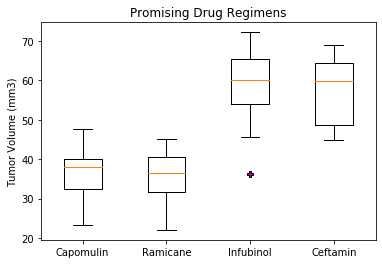

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Promising Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
magenta_plus = dict(markerfacecolor='m', marker='P')
ax1.boxplot(Tumor_append,flierprops=magenta_plus)
x_axis = np.arange(len(promising_drugs))
tick_locations = [value+1 for value in x_axis]
plt.xticks(tick_locations, promising_drugs)
plt.show()

## Line and scatter plots

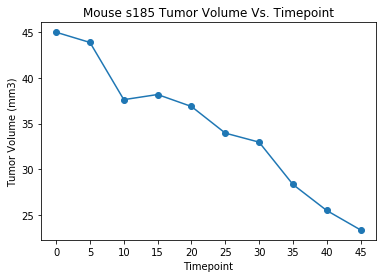

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice = regimen_index.loc[['Capomulin']]
capomulin_mice_index = capomulin_mice.set_index("Mouse ID")
s185 = capomulin_mice_index.loc[["s185"]]
x_axis = np.arange(len(s185["Timepoint"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, s185["Timepoint"])
plt.title('Mouse s185 Tumor Volume Vs. Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel("Timepoint")
plt.plot(x_axis, s185["Tumor Volume (mm3)"],marker ="o")

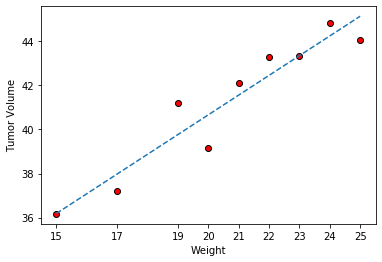

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
drug_regimen_index = data_set_df.set_index("Drug Regimen")
capomulin_mice_weight = drug_regimen_index.loc[['Capomulin']]
cap_mice_weight = capomulin_mice_weight.reset_index()
group_mice_weight = cap_mice_weight.groupby("Weight (g)").mean()
reset_group_weight =group_mice_weight.reset_index()
weight = reset_group_weight['Weight (g)']
tumor = reset_group_weight["Tumor Volume (mm3)"]


vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weight,tumor)
vc_fit = vc_slope * weight + vc_int
plt.scatter(weight,tumor,marker="o", facecolors="red", edgecolors="black" )
plt.xticks(weight,)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.plot(weight,vc_fit,"--")
plt.show()

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = round(st.pearsonr(weight,tumor)[0],2)
print(f"The correlation coefficient between Weight (g) and Tumor Volume (mm3) is {correlation_coefficient}")

The correlation coefficient between Weight (g) and Tumor Volume (mm3) is 0.95
